<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#열-추가" data-toc-modified-id="열-추가-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>열 추가</a></span><ul class="toc-item"><li><span><a href="#mean_price" data-toc-modified-id="mean_price-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>mean_price</a></span></li><li><span><a href="#mean_cnt_month" data-toc-modified-id="mean_cnt_month-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>mean_cnt_month</a></span></li><li><span><a href="#city" data-toc-modified-id="city-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>city</a></span><ul class="toc-item"><li><span><a href="#num_city_shop" data-toc-modified-id="num_city_shop-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>num_city_shop</a></span></li><li><span><a href="#mean_city_sales" data-toc-modified-id="mean_city_sales-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>mean_city_sales</a></span></li></ul></li><li><span><a href="#mean_sales_category" data-toc-modified-id="mean_sales_category-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>mean_sales_category</a></span></li><li><span><a href="#tot_sales_category" data-toc-modified-id="tot_sales_category-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>tot_sales_category</a></span></li><li><span><a href="#필요없는-열-제거" data-toc-modified-id="필요없는-열-제거-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>필요없는 열 제거</a></span></li><li><span><a href="#dateblocknum-을-열로-바꾸기" data-toc-modified-id="dateblocknum-을-열로-바꾸기-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>dateblocknum 을 열로 바꾸기</a></span></li></ul></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Feature engineering</a></span><ul class="toc-item"><li><span><a href="#relabeling" data-toc-modified-id="relabeling-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>relabeling</a></span></li></ul></li><li><span><a href="#modeling" data-toc-modified-id="modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>modeling</a></span><ul class="toc-item"><li><span><a href="#xgboost" data-toc-modified-id="xgboost-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>xgboost</a></span><ul class="toc-item"><li><span><a href="#feature-selection" data-toc-modified-id="feature-selection-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>feature selection</a></span></li></ul></li><li><span><a href="#linear-regression" data-toc-modified-id="linear-regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>linear regression</a></span><ul class="toc-item"><li><span><a href="#중요-변수-20개" data-toc-modified-id="중요-변수-20개-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>중요 변수 20개</a></span></li></ul></li><li><span><a href="#random-forest" data-toc-modified-id="random-forest-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>random forest</a></span></li></ul></li></ul></div>

In [184]:
import pandas as pd # File I/O
import numpy as np # Linear algebra

# Vlusualization
import matplotlib.pyplot as plt
import seaborn as sb

# Scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import statsmodels.api as sm

# metrices
from sklearn.metrics import mean_squared_error as mse

In [3]:
df_sales = pd.read_csv('data/df_sales.csv')

In [4]:
df_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,week_day,item_cnt_month,item_name,item_category_id,item_category_name,main_category,sub_category,shop_name,city
0,02.01.2013,0,59,22154,999.00,1.0,2,1,2013,2,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Кино,Blu,"Ярославль ТЦ ""Альтаир""",Ярославль
1,03.01.2013,0,25,2552,899.00,1.0,3,1,2013,3,0.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,Музыка,Винил,"Москва ТРК ""Атриум""",Москва
2,05.01.2013,0,25,2552,899.00,-1.0,5,1,2013,5,0.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,Музыка,Винил,"Москва ТРК ""Атриум""",Москва
3,06.01.2013,0,25,2554,1709.05,1.0,6,1,2013,6,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,Музыка,Винил,"Москва ТРК ""Атриум""",Москва
4,15.01.2013,0,25,2555,1099.00,1.0,15,1,2013,1,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,Музыка,CD фирменного производства,"Москва ТРК ""Атриум""",Москва


In [5]:
df_sales['city'].nunique()

32

## 열 추가

### mean_price

In [6]:
# Price : 아이템의 평균가격
mean_price = df_sales.groupby('item_id')['item_price'].mean().reset_index()
mean_price = mean_price.rename(columns={'item_price':'mean_price'}) # rename
df_sales = pd.merge(left = df_sales, right = mean_price, on = 'item_id', how = 'left')

### mean_cnt_month

In [7]:
# mean_sales : 월 평균 판매량
mean_sales = df_sales.groupby('item_id')['item_cnt_month'].mean().reset_index()
mean_sales = mean_sales.rename(columns = {'item_cnt_month' : 'mean_cnt_month'})
df_sales = pd.merge(left = df_sales, right = mean_sales, on = 'item_id', how = 'left')

### city

#### num_city_shop

In [8]:
# 도시내 매장 수
num_city_shop = df_sales.groupby('city')['shop_id'].nunique().reset_index()
num_city_shop = num_city_shop.rename(columns = {'shop_id' : 'num_city_shop'})
df_sales = pd.merge(left = df_sales, right = num_city_shop, on = 'city', how = 'left')

#### mean_city_sales

In [9]:
# 도시내 총 판매량
city_tot_sales = df_sales.groupby('city')['item_cnt_day'].sum().reset_index()
city_tot_sales = city_tot_sales.rename(columns = {'item_cnt_day' : 'city_tot_sales'})
df_sales = pd.merge(left = df_sales, right = city_tot_sales, on = 'city', how = 'left')

### mean_sales_category

In [10]:
# 카테고리 내 아이템 월 평균 판매량
mean_sales_category = df_sales.groupby(['main_category','sub_category'])['item_cnt_month'].mean().reset_index()
mean_sales_category = mean_sales_category.rename(columns = {'item_cnt_month' : 'mean_sales_category'})
df_sales = pd.merge(left = df_sales, right = mean_sales_category, on = ['main_category','sub_category'], how = 'left')

### tot_sales_category

In [11]:
# 카테고리 내 아이템 총  판매량
total_sales_category = df_sales.groupby(['main_category','sub_category'])['item_cnt_month'].sum().reset_index()
total_sales_category = total_sales_category.rename(columns = {'item_cnt_month' : 'total_sales_category'})
df_sales = pd.merge(left = df_sales, right = total_sales_category, on = ['main_category','sub_category'], how = 'left')

In [12]:
df_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,week_day,...,main_category,sub_category,shop_name,city,mean_price,mean_cnt_month,num_city_shop,city_tot_sales,mean_sales_category,total_sales_category
0,02.01.2013,0,59,22154,999.00,1.0,2,1,2013,2,...,Кино,Blu,"Ярославль ТЦ ""Альтаир""",Ярославль,702.932203,1.440678,1,46768.0,2.741183,646963.0
1,03.01.2013,0,25,2552,899.00,1.0,3,1,2013,3,...,Музыка,Винил,"Москва ТРК ""Атриум""",Москва,937.888889,0.555556,13,1198950.0,1.282003,17566.0
2,05.01.2013,0,25,2552,899.00,-1.0,5,1,2013,5,...,Музыка,Винил,"Москва ТРК ""Атриум""",Москва,937.888889,0.555556,13,1198950.0,1.282003,17566.0
3,06.01.2013,0,25,2554,1709.05,1.0,6,1,2013,6,...,Музыка,Винил,"Москва ТРК ""Атриум""",Москва,1709.050000,1.000000,13,1198950.0,1.282003,17566.0
4,15.01.2013,0,25,2555,1099.00,1.0,15,1,2013,1,...,Музыка,CD фирменного производства,"Москва ТРК ""Атриум""",Москва,1123.101786,1.214286,13,1198950.0,2.496785,19802.0


In [13]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2904495 entries, 0 to 2904494
Data columns (total 24 columns):
date                    object
date_block_num          int64
shop_id                 int64
item_id                 int64
item_price              float64
item_cnt_day            float64
day                     int64
month                   int64
year                    int64
week_day                int64
item_cnt_month          float64
item_name               object
item_category_id        int64
item_category_name      object
main_category           object
sub_category            object
shop_name               object
city                    object
mean_price              float64
mean_cnt_month          float64
num_city_shop           int64
city_tot_sales          float64
mean_sales_category     float64
total_sales_category    float64
dtypes: float64(8), int64(9), object(7)
memory usage: 554.0+ MB


### 필요없는 열 제거

In [14]:
#'item_price','shop_id','item_id','date','day','month','year','week_day','item_name','item_category_id','item_category_name','shop_name' 제거
df_sales_2 = df_sales.drop(['item_cnt_day','item_price','item_id','shop_id','date','day','month','year','week_day','item_name','item_category_id','item_category_name','shop_name'],axis = 1)

In [15]:
df_sales_2.head()

,date_block_num,item_cnt_month,main_category,sub_category,city,mean_price,mean_cnt_month,num_city_shop,city_tot_sales,mean_sales_category,total_sales_category
0,0,1.0,Кино,Blu,Ярославль,702.932203,1.440678,1,46768.0,2.741183,646963.0
1,0,0.0,Музыка,Винил,Москва,937.888889,0.555556,13,1198950.0,1.282003,17566.0
2,0,0.0,Музыка,Винил,Москва,937.888889,0.555556,13,1198950.0,1.282003,17566.0
3,0,1.0,Музыка,Винил,Москва,1709.050000,1.000000,13,1198950.0,1.282003,17566.0
4,0,1.0,Музыка,CD фирменного производства,Москва,1123.101786,1.214286,13,1198950.0,2.496785,19802.0


In [16]:
cols = df_sales_2.columns.tolist()

In [17]:
cols

['date_block_num',
 'item_cnt_month',
 'main_category',
 'sub_category',
 'city',
 'mean_price',
 'mean_cnt_month',
 'num_city_shop',
 'city_tot_sales',
 'mean_sales_category',
 'total_sales_category']

### dateblocknum 을 열로 바꾸기

In [18]:
df_sales_3 = df_sales_2.pivot_table('item_cnt_month', ['city','main_category','sub_category','mean_price','num_city_shop','city_tot_sales','mean_sales_category','total_sales_category'], 'date_block_num').reset_index().fillna(0)

In [19]:
df_sales_3.to_csv('data/df_sales_3.csv',index = False)

In [20]:
df_sales_3 = pd.read_csv('data/df_sales_3.csv')

In [21]:
df_sales_3.head()

,city,main_category,sub_category,mean_price,num_city_shop,city_tot_sales,mean_sales_category,total_sales_category,0,1,...,24,25,26,27,28,29,30,31,32,33
0,!Якутск,PC,Гарнитуры/Наушники,93.000000,2,18016.0,1.000000,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,!Якутск,Аксессуары,PS2,283.000000,2,18016.0,1.000000,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,!Якутск,Аксессуары,PS3,93.000000,2,18016.0,3.325064,61384.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,!Якутск,Аксессуары,PS3,367.666667,2,18016.0,3.325064,61384.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,!Якутск,Аксессуары,PS3,378.000000,2,18016.0,3.325064,61384.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df_sales_3['city'].unique()

array(['!Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж',
       'Выездная', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
       'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев',
       'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки', 'Цифровой', 'Чехов',
       'Якутск', 'Ярославль'], dtype=object)

In [23]:
df_sales_3.shape

(257172, 42)

## Feature engineering

### relabeling

'33'을 기준으로 증가하도록 재정렬

In [24]:
df_sales_4 = df_sales_3.copy(deep=True)

In [25]:
n_rows = df_sales_4.shape[0]
n_cols = df_sales_4.shape[1]

In [26]:
features = ['city', 'main_category', 'sub_category', 'mean_price', 'num_city_shop','city_tot_sales', 'mean_sales_category', 'total_sales_category']

In [27]:
df_sales_4['city'].unique()

array(['!Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж',
       'Выездная', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
       'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев',
       'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки', 'Цифровой', 'Чехов',
       'Якутск', 'Ярославль'], dtype=object)

In [28]:
for feat in features:
    print(f'{feat} relabelling')
    x = df_sales_4.groupby(feat)['33'].mean().sort_values().reset_index()
    rank = x.index
    att = x[feat]
    dict_rank = dict(zip(att,rank))
    df_sales_4[feat] = df_sales_4[feat].apply(lambda val : dict_rank[val])

city relabelling
main_category relabelling
sub_category relabelling
mean_price relabelling
num_city_shop relabelling
city_tot_sales relabelling
mean_sales_category relabelling
total_sales_category relabelling


## modeling
* xgboost : 1.107
* randomforest : 1.134

### xgboost

In [51]:
x = df_sales_4.drop(['33'],axis =1)
y = df_sales_4['33']

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3, random_state = 123)

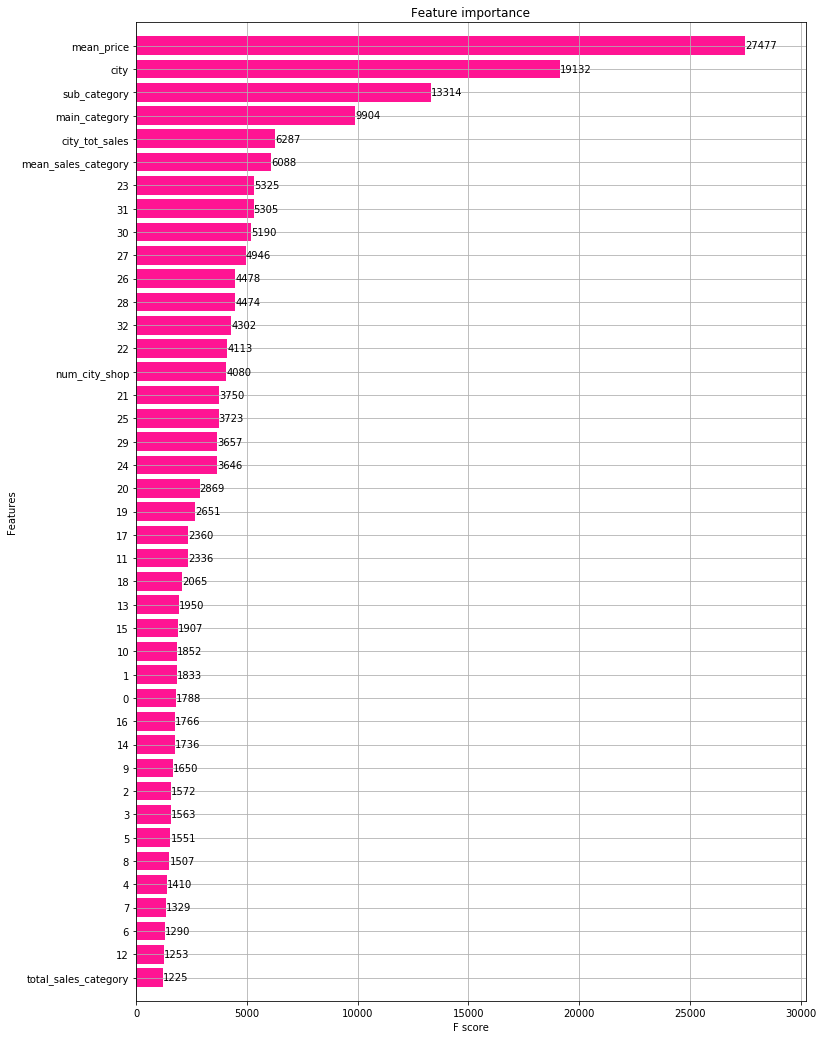

In [80]:
# xgb
xgb_params = {
    'eta': 0.005,
    'max_depth': 20,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}
dtrain = xgb.DMatrix(x_train, y_train, feature_names=x_train.columns.values)

XGB_model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(XGB_model, max_num_features=50, height=0.8, ax=ax, color = 'deeppink')
plt.show()

In [81]:
dtest = xgb.DMatrix(x_test, feature_names=x_test.columns.values)
y_pred = XGB_model.predict(dtest)

In [84]:
np.sqrt(mse(y_test,y_pred))

1.1076078842418977

#### feature selection

In [178]:
feature_top_20 = ['mean_price','city','sub_category','main_category','sub_category','city_tot_sales','mean_sales_category',
                 '23','31','30','27','26','28','32','22','num_city_shop','21','25','29','24','33']

### linear regression

In [96]:
ols = sm.OLS(endog = y_train, exog =x_train)
lm = ols.fit()
y_pred_lm = lm.predict(x_test)
rmse = np.sqrt(mse(y_test,y_pred_lm))
rmse

4.5612421831765495

In [97]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     33   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     6125.
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:26:30   Log-Likelihood:            -4.8243e+05
No. Observations:              180020   AIC:                         9.649e+05
Df Residuals:                  179979   BIC:                         9.654e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
city                    -0.0666 

#### 중요 변수 20개

In [167]:
feature_top_20 = ['mean_price','city','sub_category','main_category','sub_category','city_tot_sales','mean_sales_category',
                 '23','31','30','27','26','28','32','22','num_city_shop','21','25','29','24','33']

In [168]:
remove_cols = [col for col in df_sales_4.columns if col not in feature_top_20]

In [169]:
df_sales_5 = df_sales_4.drop(remove_cols,axis =1)

In [170]:
x = df_sales_5.drop(['33'],axis =1)
y = df_sales_5['33']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3, random_state = 123)

In [171]:
ols = sm.OLS(endog = y_train, exog =x_train)
lm = ols.fit()
y_pred_lm = lm.predict(x_test)
rmse = np.sqrt(mse(y_test,y_pred_lm))
rmse

3.869687887238876

In [172]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     33   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     8748.
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:57:55   Log-Likelihood:            -5.0219e+05
No. Observations:              180020   AIC:                         1.004e+06
Df Residuals:                  180001   BIC:                         1.005e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
city                   -0.0369    

### random forest

In [193]:
rf = RandomForestRegressor(max_features=15, min_samples_split=4, n_estimators=50, min_samples_leaf=2)

In [194]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=15, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [195]:
y_pred_rf = rf.predict(x_test)

In [196]:
np.sqrt(mse(y_test,y_pred))

1.1338478207575131